In [29]:
import pymysql as m

In [30]:
con = m.connect(host='localhost', user='root', password='1234', charset='utf8')
cur = con.cursor()

In [31]:
q = "CREATE DATABASE DB_FROM_PYTHON;"
cur.execute(q)
con.close()

In [46]:
con = m.connect(host='localhost', user='root', password='1234', db='DB_FROM_PYTHON', charset='utf8')
cur = con.cursor()
q = """CREATE TABLE table_from_python(
id INTEGER PRIMARY KEY,
name VARCHAR(100),
email VARCHAR(100),
devision VARCHAR(100)
)
"""
cur.execute(q)
con.commit()
con.close()

In [54]:
con = m.connect(host='localhost',user='root',password='1234',
                db = 'DB_FROM_PYTHON',charset='utf8')
cur = con.cursor() 
q = 'INSERT INTO table_from_python(id, name, division) VALUES (%s,%s,%s)'
cur.execute(q,(1, "Kim", "DEV"))
cur.execute(q,(2, "Lee", "SAL"))
cur.execute(q,(3, "Park", "ADM"))
con.commit()
con.close()


OperationalError: (1054, "Unknown column 'division' in 'field list'")

In [50]:
con = m.connect(host='localhost', user='root', password='1234', db='DB_FROM_PYTHON', charset='utf8')
cur = con.cursor()
q = 'INSERT INTO table_from_python(id, name, division) VALUES (%d, %s, %s)'
cur.execute(q.format(1, "Kim","dev"))
cur.execute(q.format(2, "Lee","sal"))
cur.execute(q.format(3, "Park","adm"))
con.commit()
con.close()

ProgrammingError: (1064, "You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near '%d, %s, %s)' at line 1")

In [51]:
mes1 = "hello, {0}".format("Mr.kim")
print(mes1)

hello, Mr.kim


In [52]:
q = 'INSERT INTO table_from_python(id,name,division) VALUES (%d, %s,%s)'

In [55]:
con = m.connect(host='localhost',user='root',password='1234',
                db = 'DB_FROM_PYTHON',charset='utf8')
cur = con.cursor() 
q = 'SELECT * FROM table_from_python;'
cur.execute(q)
res = cur.fetchall()
for data in res:
    print(data)
con.commit()
con.close()

In [57]:
import pandas as pd
con = m.connect(host='localhost',user='root',password='1234',
                db = 'DB_FROM_PYTHON',charset='utf8')
cur = con.cursor() 
q = 'SELECT * FROM table_from_python;'
cur.execute(q)
res = cur.fetchall()
df1 = pd.DataFrame(res)
con.close()
df1

Empty DataFrame
Columns: []
Index: []

In [58]:
import pandas as pd
con = m.connect(host='localhost',user='root',password='1234',
                db = 'DB_FROM_PYTHON',charset='utf8')
cur = con.cursor() 
q = 'SELECT * FROM table_from_python;'
cur.execute(q)
res = cur.fetchall()
col = ["id","name","email","division"]
df1 = pd.DataFrame(res,columns=col)
con.close()
df1

Empty DataFrame
Columns: [id, name, email, division]
Index: []

In [59]:
import pandas as pd
con = m.connect(host='localhost',user='root',password='1234',
                db = 'DB_FROM_PYTHON',charset='utf8')
cur = con.cursor() 
q = 'UPDATE table_from_python SET email =%s WHERE id =%s;'
cur.execute(q,("developer_kim@good.com",1))
cur.execute(q,("sales_pro_lee@good.com",2))
cur.execute(q,("admin_park@good.com",3))
con.commit()
con.close()

In [62]:
df_tita = pd.read_csv("titanic_full.csv")

In [69]:
df_tita

PassengerId  Survived  Pclass  \
0               1       0.0       3   
1               2       1.0       1   
2               3       1.0       3   
3               4       1.0       1   
4               5       0.0       3   
...           ...       ...     ...   
1304         1305       NaN       3   
1305         1306       NaN       1   
1306         1307       NaN       3   
1307         1308       NaN       3   
1308         1309       NaN       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                 ...     ...   ...    ...   
1304                                 Spector, Mr. Woolf    male   NaN      0   
1305                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
1306                       Saether, Mr. Simon Sivertsen    male  38.5      0   
1307                                Ware, Mr. Frederick    male   NaN      0   
1308                           Peter, Master. Michael J    male   NaN      1   

      Parch              Ticket      Fare Cabin Embarked  \
0         0           A/5 21171    7.2500   NaN        S   
1         0            PC 17599   71.2833   C85        C   
2         0    STON/O2. 3101282    7.9250   NaN        S   
3         0              113803   53.1000  C123        S   
4         0              373450    8.0500   NaN        S   
...     ...                 ...       ...   ...      ...   
1304      0           A.5. 3236    8.0500   NaN        S   
1305      0            PC 17758  108.9000  C105        C   
1306      0  SOTON/O.Q. 3101262    7.2500   NaN        S   
1307      0              359309    8.0500   NaN        S   
1308      1                2668   22.3583   NaN        C   

                                Hometown      Boarded  \
0             Bridgerule, Devon, England  Southampton   
1                 New York, New York, US    Cherbourg   
2                     Jyväskylä, Finland  Southampton   
3            Scituate, Massachusetts, US  Southampton   
4     Birmingham, West Midlands, England  Southampton   
...                                  ...          ...   
1304                     London, England  Southampton   
1305                       Madrid, Spain    Cherbourg   
1306        Skaun, Sør-Trøndelag, Norway  Southampton   
1307          Greenwich, London, England  Southampton   
1308                   Sar'al[81], Syria    Cherbourg   

                                  Destination Lifeboat  Body  
0     Qu'Appelle Valley, Saskatchewan, Canada      NaN   NaN  
1                      New York, New York, US        4   NaN  
2                               New York City      14?   NaN  
3                 Scituate, Massachusetts, US        D   NaN  
4                               New York City      NaN   NaN  
...                                       ...      ...   ...  
1304                            New York City      NaN   NaN  
1305                   New York, New York, US        8   NaN  
1306                                       US      NaN  32MB  
1307                            New York City      NaN   NaN  
1308                    Detroit, Michigan, US        D   NaN  

[1309 rows x 17 columns]

In [70]:
df_tita_2 = df_tita[['PassengerId','Survived','Pclass','Sex','Age','SibSp','Parch','Fare']]

In [71]:
df_c= df_tita_2.corr()
df_c

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.038354  0.028814 -0.055224  0.008942   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.038354 -0.338481  1.000000 -0.408106  0.060832  0.018322   
Age             0.028814 -0.077221 -0.408106  1.000000 -0.243699 -0.150917   
SibSp          -0.055224 -0.035322  0.060832 -0.243699  1.000000  0.373587   
Parch           0.008942  0.081629  0.018322 -0.150917  0.373587  1.000000   
Fare            0.031428  0.257307 -0.558629  0.178740  0.160238  0.221539   

                 Fare  
PassengerId  0.031428  
Survived     0.257307  
Pclass      -0.558629  
Age          0.178740  
SibSp        0.160238  
Parch        0.221539  
Fare         1.000000

In [72]:
import matplotlib.pyplot as plt
import seaborn as sn

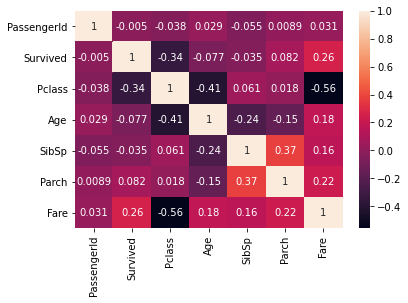

In [73]:
sn.heatmap(df_c,annot=True)
plt.show()